In [1]:
# Required Modules

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
# Loading the data and preprocessing it

mnist_data = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

In [3]:
# Defining a model

def mnist_model(train_x, train_y):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(train_x, train_y, epochs=20)
    
    return model.history

In [4]:
summ = mnist_model(train_images, train_labels)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1909 - acc: 0.9424
Epoch 2/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0801 - acc: 0.9750
Epoch 3/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0555 - acc: 0.9825
Epoch 4/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0414 - acc: 0.9867
Epoch 5/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0326 - acc: 0.9888
Epoch 6/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0271 - acc: 0.9911
Epoch 7/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0219 - acc: 0.9930
Epoch 8/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0206 - acc: 0.9934
Epoch 9/20
60000/60000 [==============================] - 6s 96us/

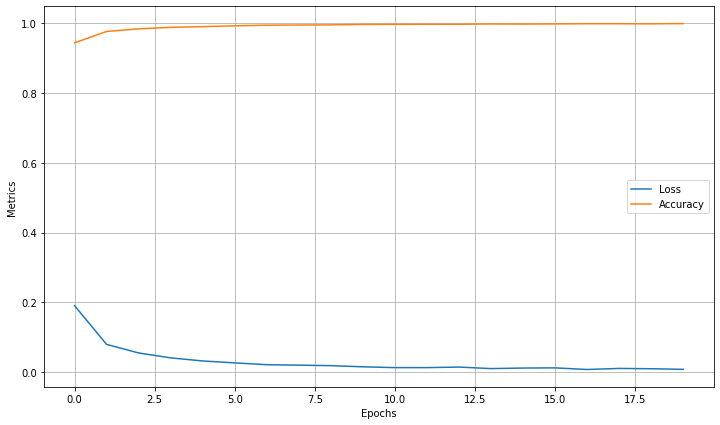

In [5]:
# Some Visualization

plt.figure()

plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Metrics")

plt.plot(summ.epoch, summ.history['loss'], label='Loss')
plt.plot(summ.epoch, summ.history['acc'], label='Accuracy')
plt.legend()